In [291]:
from astropy.io import fits
from astropy import table
from astroquery.sdss import SDSS
from astropy import coordinates as coords
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])
%matplotlib inline

In [2]:
catFile = 'catalogs/clumpy_stripe82_fullsample.fits'
catFits = fits.open(catFile) 
# catFits.info() 
catTable = table.Table(catFits[1].data)
# print(*catTable.columns, sep='\n')
n = 0
for column in catTable.columns:
    print(n, column,'\n')
    n+=1

0 objid_1 

1 sample_1 

2 asset_id 

3 objid_str 

4 total_count 

5 total_weight 

6 t01_smooth_or_features_a01_smooth_count 

7 t01_smooth_or_features_a01_smooth_weight 

8 t01_smooth_or_features_a01_smooth_fraction 

9 t01_smooth_or_features_a01_smooth_weighted_fraction 

10 t01_smooth_or_features_a02_features_or_disk_count 

11 t01_smooth_or_features_a02_features_or_disk_weight 

12 t01_smooth_or_features_a02_features_or_disk_fraction 

13 t01_smooth_or_features_a02_features_or_disk_weighted_fraction 

14 t01_smooth_or_features_a03_star_or_artifact_count 

15 t01_smooth_or_features_a03_star_or_artifact_weight 

16 t01_smooth_or_features_a03_star_or_artifact_fraction 

17 t01_smooth_or_features_a03_star_or_artifact_weighted_fraction 

18 t01_smooth_or_features_total_count 

19 t01_smooth_or_features_total_weight 

20 t02_edgeon_a04_yes_count 

21 t02_edgeon_a04_yes_weight 

22 t02_edgeon_a04_yes_fraction 

23 t02_edgeon_a04_yes_weighted_fraction 

24 t02_edgeon_a05_no_count 

25 t0

In [3]:
catTable[1]['FIELD']

125

## Spectra from Bulk

In [4]:
for cat in catTable[:5]:
    print(str(cat['RA'])+','+str(cat['DEC']))

315.90303127,-1.22853775
321.63790911,-1.12280623
324.56071869,-0.78378343
309.70230142,-0.22634834
312.71737669,-0.32570262


In [5]:
def genSpectraAQ(file):
    objFits = fits.open(file)
    objTable = table.Table(objFits[1].data)
    plt.figure(figsize=(15,7.5))
    plt.plot(10**objTable['loglam'],objTable['flux'])
    plt.show()
    return objTable

In [6]:
# genSpectraAQ('spec-0985-52431-0287.fits')

## Testing AstroQuery

In [48]:
test = {'RA':catTable[3]['RA'],'DEC':catTable[3]['DEC']}
pos = coords.SkyCoord(test['RA'],test['DEC'],unit='deg')
xid = SDSS.query_region(pos,spectro=True)
xid

/Users/mike/anaconda3/lib/python3.7/site-packages/astroquery/sdss/core.py:856: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  comments='#'))


ra,dec,objid,run,rerun,camcol,field,z,plate,mjd,fiberID,specobjid,run2d,instrument
float64,float64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,bytes4
309.702302871984,-0.226347768496051,1237656568110842101,2583,301,3,45,0.07841583,1117,52885,234,1257694565775730688,26,SDSS


In [8]:
def specPlt(catTable,index,spData):
    plt.figure(figsize=(10,5))
    plt.plot(10**spData['loglam'],spData['flux'])
    plt.title('OBJ: %s, RA: %.3f, DEC: %.3f'%(index,catTable[index]['RA'],catTable[index]['DEC']))
    plt.xlabel("Wavelength [Angstroms]")
    plt.ylabel("Flux [$10^{-17}$ erg/cm$^2$/s/A]")
    plt.tight_layout()
    plt.savefig('spectra imgs/obj_%s.png'%index)
    plt.show()

In [9]:
def genSpectra(catTable,index,pltShow):
    pos = coords.SkyCoord(catTable[index]['RA'],
                          catTable[index]['DEC'],unit='deg')
    xid = SDSS.query_region(pos,spectro=True)
    
    if not xid:
        print('--------\nNo spectra for object %s\n--------'%index)
        return
    sp = SDSS.get_spectra(matches=xid)
    spData = sp[0][1].data
    if pltShow:
        specPlt(catTable,index,spData)
    return xid,table.Table(spData)

In [10]:
# from tqdm import tqdm_notebook as tqdm
# genBar = tqdm(desc='object',total=len(catTable))
# for n in range(0,len(catTable)):
#     genSpectra(catTable,n,False)
#     genBar.update(1)

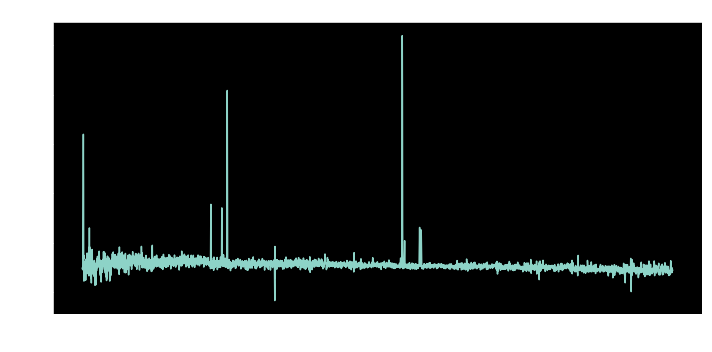

In [11]:
obj34 = genSpectra(catTable,34,True)

In [12]:
obj34[0]

ra,dec,objid,run,rerun,camcol,field,z,plate,mjd,fiberID,specobjid,run2d,instrument
float64,float64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,bytes4
310.311530645619,1.17984347905548,1237656896140018098,2659,301,6,61,0.02704323,981,52435,599,1104672501331421184,26,SDSS
310.311530645619,1.17984347905548,1237656896140018098,2659,301,6,61,0.02705698,1021,52460,527,1149688706815256576,26,SDSS


In [13]:
catTable[34]

objid_1,sample_1,asset_id,objid_str,total_count,total_weight,t01_smooth_or_features_a01_smooth_count,t01_smooth_or_features_a01_smooth_weight,t01_smooth_or_features_a01_smooth_fraction,t01_smooth_or_features_a01_smooth_weighted_fraction,t01_smooth_or_features_a02_features_or_disk_count,t01_smooth_or_features_a02_features_or_disk_weight,t01_smooth_or_features_a02_features_or_disk_fraction,t01_smooth_or_features_a02_features_or_disk_weighted_fraction,t01_smooth_or_features_a03_star_or_artifact_count,t01_smooth_or_features_a03_star_or_artifact_weight,t01_smooth_or_features_a03_star_or_artifact_fraction,t01_smooth_or_features_a03_star_or_artifact_weighted_fraction,t01_smooth_or_features_total_count,t01_smooth_or_features_total_weight,t02_edgeon_a04_yes_count,t02_edgeon_a04_yes_weight,t02_edgeon_a04_yes_fraction,t02_edgeon_a04_yes_weighted_fraction,t02_edgeon_a05_no_count,t02_edgeon_a05_no_weight,t02_edgeon_a05_no_fraction,t02_edgeon_a05_no_weighted_fraction,t02_edgeon_total_count,t02_edgeon_total_weight,t03_bar_a06_bar_count,t03_bar_a06_bar_weight,t03_bar_a06_bar_fraction,t03_bar_a06_bar_weighted_fraction,t03_bar_a07_no_bar_count,t03_bar_a07_no_bar_weight,t03_bar_a07_no_bar_fraction,t03_bar_a07_no_bar_weighted_fraction,t03_bar_total_count,t03_bar_total_weight,t04_spiral_a08_spiral_count,t04_spiral_a08_spiral_weight,t04_spiral_a08_spiral_fraction,t04_spiral_a08_spiral_weighted_fraction,t04_spiral_a09_no_spiral_count,t04_spiral_a09_no_spiral_weight,t04_spiral_a09_no_spiral_fraction,t04_spiral_a09_no_spiral_weighted_fraction,t04_spiral_total_count,t04_spiral_total_weight,t05_bulge_prominence_a10_no_bulge_count,t05_bulge_prominence_a10_no_bulge_weight,t05_bulge_prominence_a10_no_bulge_fraction,t05_bulge_prominence_a10_no_bulge_weighted_fraction,t05_bulge_prominence_a11_just_noticeable_count,t05_bulge_prominence_a11_just_noticeable_weight,t05_bulge_prominence_a11_just_noticeable_fraction,t05_bulge_prominence_a11_just_noticeable_weighted_fraction,t05_bulge_prominence_a12_obvious_count,t05_bulge_prominence_a12_obvious_weight,t05_bulge_prominence_a12_obvious_fraction,t05_bulge_prominence_a12_obvious_weighted_fraction,t05_bulge_prominence_a13_dominant_count,t05_bulge_prominence_a13_dominant_weight,t05_bulge_prominence_a13_dominant_fraction,t05_bulge_prominence_a13_dominant_weighted_fraction,t05_bulge_prominence_total_count,t05_bulge_prominence_total_weight,t06_odd_a14_yes_count,t06_odd_a14_yes_weight,t06_odd_a14_yes_fraction,t06_odd_a14_yes_weighted_fraction,t06_odd_a15_no_count,t06_odd_a15_no_weight,t06_odd_a15_no_fraction,t06_odd_a15_no_weighted_fraction,t06_odd_total_count,t06_odd_total_weight,t07_rounded_a16_completely_round_count,t07_rounded_a16_completely_round_weight,t07_rounded_a16_completely_round_fraction,t07_rounded_a16_completely_round_weighted_fraction,t07_rounded_a17_in_between_count,t07_rounded_a17_in_between_weight,t07_rounded_a17_in_between_fraction,t07_rounded_a17_in_between_weighted_fraction,t07_rounded_a18_cigar_shaped_count,t07_rounded_a18_cigar_shaped_weight,t07_rounded_a18_cigar_shaped_fraction,t07_rounded_a18_cigar_shaped_weighted_fraction,t07_rounded_total_count,t07_rounded_total_weight,t08_odd_feature_a19_ring_count,t08_odd_feature_a19_ring_weight,t08_odd_feature_a19_ring_fraction,t08_odd_feature_a19_ring_weighted_fraction,t08_odd_feature_a20_lens_or_arc_count,t08_odd_feature_a20_lens_or_arc_weight,t08_odd_feature_a20_lens_or_arc_fraction,t08_odd_feature_a20_lens_or_arc_weighted_fraction,t08_odd_feature_a21_disturbed_count,t08_odd_feature_a21_disturbed_weight,t08_odd_feature_a21_disturbed_fraction,t08_odd_feature_a21_disturbed_weighted_fraction,t08_odd_feature_a22_irregular_count,t08_odd_feature_a22_irregular_weight,t08_odd_feature_a22_irregular_fraction,t08_odd_feature_a22_irregular_weighted_fraction,t08_odd_feature_a23_other_count,t08_odd_feature_a23_other_weight,t08_odd_feature_a23_other_fraction,t08_odd_feature_a23_other_weighted_fraction,t08_odd_feature_a24_merger_count,t08_odd_feature_a24_merger_weight,t08_o

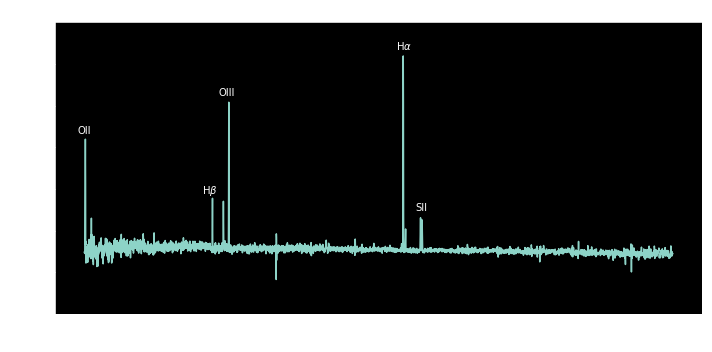

In [14]:
plt.figure(figsize=(10,5))
plt.plot(10**obj34[1]['loglam'],obj34[1]['flux'])
plt.title('OBJ: %s, RA: %.3f, DEC: %.3f, PLATE: %s, MJD: %s, FIBER: %s'
          %(34,catTable[34]['RA'],catTable[34]['DEC'],obj34[0]['plate'][0],
            obj34[0]['mjd'][0],obj34[0]['fiberID'][0]))
plt.xlabel("Wavelength [Angstroms]")
plt.ylabel("Flux [$10^{-17}$ erg/cm$^2$/s/A]")
plt.ylim(-20,120)
# plt.xlim(6800,7000)
plt.text(6680,107,r'H$\alpha$')
plt.text(6850,30,'SII')
plt.text(5050,85,'OIII')
plt.text(4900,38,r'H$\beta$')
plt.text(3760,67,'OII')
plt.tight_layout()
plt.savefig('spectra imgs/label_obj_%s.png'%34)
plt.show()

## Let's play "Try to get a metallicity!"

We will try to generate a metallicity for object 34 in Melanie's clump catalog as an example (since I'm too lazy to look for a different spectra).

### M91 Theoretical Calibration

Let's use the M91 calibration mentioned in [Kewley & Ellison 2008 (KE08)](http://adsabs.harvard.edu/abs/2008ApJ...681.1183K):

$$12 + \log(O/H)_\text{lower} = 12 - 4.944 + 0.767x + 0.602x^2 - y(0.29+0.332x - 0.331x^2)$$

$$12 + \log(O/H)_\text{upper} = 12 - 2.939 - 0.2x - 0.37x^2 - 0.305 x^3 - 0.0283x^4 - y(0.0047 - 0.221x - 0.102x^2 - 0.0817x^3 - 0.00717x^4)$$

where $$x = \log R_{23} = \log\left[\frac{[\text{OII}\lambda3727 + [\text{OIII}]\lambda4959 + [\text{OIII}]\lambda5007}{\text{H}\beta}\right]$$
and $$y = \log\text{O}_{32} = \log\left[\frac{[\text{OIII}]\lambda4959 + [\text{OIII}]\lambda5007}{[\text{OII}]\lambda3727}\right]$$

For now, we'll be lazy and take the line fluxes directly from the [SDSS DR12 Science Archive Server](https://dr12.sdss.org/spectrumDetail?mjd=52435&fiber=599&plateid=981).

In [15]:
def getlogR23(OII3727,OIII4959,OIII5007,HB):
    return np.log10((OII3727 + OIII4959 + OIII5007)/HB)

def getlogO32(OIII4959,OIII5007,OII3727):
    return np.log10((OIII4959 + OIII5007)/OII3727)

In [16]:
def getlogOHlow(x,y):
    return (-4.944 + 0.767*x + 0.602*x**2 - y*(0.29 + 0.332*x - 0.331*x**2))

def getlogOHup(x,y):
    return (-2.939 - 0.2*x - 0.37*x**2 - 0.305*x**3 - 0.0283*x**4 - 
            y*(0.0047 - 0.221*x - 0.102*x**2 - 0.0817*x**3 - 0.00717*x**4))

In [17]:
# all in units of 1e-17 erg/cm^2/s
OII3727 = 108
OIII4959 = 68.61
OIII5007 = 207.8
HB = 81.96

In [18]:
x = getlogR23(OII3727,OIII4959,OIII5007,HB)
y = getlogO32(OIII4959,OIII5007,OII3727)

In [19]:
logOHlow = getlogOHlow(x,y)
logOHup = getlogOHup(x,y)

print(' low O/H:\t',10**logOHlow,'\nhigh O/H:\t',10**logOHup)

 low O/H:	 4.9381052649105053e-05 
high O/H:	 0.0005625498281286387


Let's ssee how it compares to the other items on the graph by adding 12:

In [20]:
logOHlow12 = logOHlow+12
logOHup12 = logOHup+12
print('low:\tlog O/H + 12 =',logOHlow12,'\nhigh:\tlog O/H + 12 =',logOHup12)

low:	log O/H + 12 = 7.693560343490305 
high:	log O/H + 12 = 8.75016099633521


Comparing these to the items shown in Figures 1 and 2, our lower branch doesn't even appear on the graph while the upper branch actually appears fairly reasonable.

### Branching Out

Lets determine if this makes sense by following section A1 in KE08. First we need to determine if we are using the upper branch or the lower branch. To do this, we need to get $$\log\left(\frac{[\text{NII}]\lambda6584}{[\text{OII}]\lambda3727}\right)$$

In [21]:
def getlogNiiOii(NII6584,OII3727):
    return np.log10(NII6584/OII3727)

In [22]:
NII6584 = 48.93

In [23]:
logNiiOii = getlogNiiOii(NII6584,OII3727)
print(logNiiOii)

-0.34384853972701146


The break between upper and lower branches is set at $$\log\left(\frac{[\text{NII}]}{[\text{OII}]}\right) \approx -1.2$$ so we should use the upper branch, as we kind of determined already.

### Check the graphs!

How about the mass, though? Where does it fit on this graph? That is a, uh, good question... these catalogs specifically don't have masses, and neither does the archive server, but I'd imagine I could find them.

Okay I think I got it after a long treasure hunt. [Here](http://skyserver.sdss.org/DR12//en/tools/explore/Summary.aspx?sid=1104672501331421184) is the link (I used `FSPSGranEarlyDust`), which gives us a $\log M = 9.49196471616599$. (It also gives us lots of useful stuff like age, metallicity(!), mass to light, etc.)

The point $(\log M, 12 + \log(O/H)_\text{upper}) = (9.492,8.750)$ fits nicely onto the graph in Fig. 1 for M91.

### Metallicity problems?
Quick aside to look at metallicities. We're given a $Z$ on that webpage, but it doesn't match up...

In [24]:
givenZ12 = np.log10(0.00769999995827675) + 12

In [25]:
print('given:\t\tlog Z + 12 =',givenZ12, '\ncalculated:\tlog O/H + 12 =',logOHup12)

given:		log Z + 12 = 9.886490722819213 
calculated:	log O/H + 12 = 8.75016099633521


~~ACTUALLY this makes sense since we should only be doing *relative* metallicity comparisons and this might be using a different calibration. Interestingly, the given $Z$ doesn't seem to match **any** of the calibrations listed in KE08.~~

**UPDATE (2/27)**

Of course this doesn't work - $Z$ is fundamentally different from $[O/H]$.

## Let's try to download stuff with SQL!

Supposedly we *should* be able to download all the information (spectra, masses, object type, etc.) from the [SDSS SkyServers](http://skyserver.sdss.org/DR15/en/home.aspx).

SQL Tutorial: http://skyserver.sdss.org/DR15/en/help/howto/search/searchhowtohome.aspx

Another link: http://balbuceosastropy.blogspot.com/2013/10/an-easy-way-to-make-sql-queries-from.html

In [26]:
import pandas as pd
import mechanize
from io import BytesIO
from astropy.table import Table

url = 'http://skyserver.sdss.org/dr15/en/tools/search/sql.aspx'
br = mechanize.Browser()
br.open(url)
br.select_form(name='sql')

In [27]:
s = "select top 100 \
x.plate,x.mjd,x.ra,x.dec,x.z,x.logMass, \
g.oii_3726_flux,g.oii_3726_flux_err \
from stellarMassFSPSGranEarlyDust x \
JOIN galSpecLine g ON g.specObjID = x.specObjID \
WHERE \
ra BETWEEN 140 AND 141 AND \
dec BETWEEN 20 AND 21"

In [28]:
br['cmd'] = s
br['format'] = ['csv']
response = br.submit()

In [29]:
response.get_data()

b'#Table1\nplate,mjd,ra,dec,z,logMass,oii_3726_flux,oii_3726_flux_err\n2290,53727,140.64793,20.851769,0.03163753,10.5796135812458,23.22126,5.492704\n2290,53727,140.80891,20.995964,0.03072425,9.87657533955672,18.95947,5.541257\n2288,53699,140.15684,20.083256,0.0495753,10.2272191214165,3.365189,4.690804\n2290,53727,140.95356,20.780761,0.1044504,11.3824132388912,-2.640033,5.969037\n2288,53699,140.15554,20.105117,0.05049838,9.99064286708204,-1.027585,4.423676\n2290,53727,140.69767,20.63901,0.03892758,9.4751080214046,67.36094,5.384182\n2288,53699,140.50641,20.025607,0.1896406,11.4596037629911,11.31752,4.007096\n2290,53727,140.26998,20.665789,0.1331454,11.2624220531044,-8.543897,6.060204\n2288,53699,140.05184,20.2779,0.132707,10.9095832417465,4.076246,4.504348\n2290,53727,140.57416,20.706345,0.1052138,11.0071838404101,6.615705,6.957438\n2288,53699,140.10695,20.211484,0.1893492,11.3441016897656,7.287684,2.694031\n2290,53727,140.44327,20.924712,0.1320706,10.7416424691483,30.03158,3.689734\n228

In [30]:
file_like = BytesIO(response.get_data())
df = pd.read_csv(file_like,skiprows=1)

In [31]:
df

,plate,mjd,ra,dec,z,logMass,oii_3726_flux,oii_3726_flux_err
0,2290,53727,140.64793,20.851769,0.031638,10.579614,23.221260,5.492704
1,2290,53727,140.80891,20.995964,0.030724,9.876575,18.959470,5.541257
2,2288,53699,140.15684,20.083256,0.049575,10.227219,3.365189,4.690804
3,2290,53727,140.95356,20.780761,0.104450,11.382413,-2.640033,5.969037
4,2288,53699,140.15554,20.105117,0.050498,9.990643,-1.027585,4.423676
5,2290,53727,140.69767,20.639010,0.038928,9.475108,67.360940,5.384182
6,2288,53699,140.50641,20.025607,0.189641,11.459604,11.317520,4.007096
7,2290,53727,140.26998,20.665789,0.133145,11.262422,-8.543897,6.060204
8,2288,53699,140.05184,20.277900,0.132707,10.909583,4.076246,4.504348
9,2290,53727,140.57416,20.706345,0.105214,11.007184,6.615705,6.957438


In [32]:
def SDSS_select(sql):
    
    '''
    input: SQL query
    output: pandas DF
    '''
    
    import pandas as pd
    import mechanize
    from io import BytesIO
    from astropy.table import Table
    
    url = 'http://skyserver.sdss.org/dr15/en/tools/search/sql.aspx'
    br = mechanize.Browser()
    br.open(url)
    br.select_form(name='sql')
    br['cmd'] = sql
    br['format'] = ['csv']
    response = br.submit()
    file_like = BytesIO(response.get_data())
    df = pd.read_csv(file_like,skiprows=1)
    return df

In [33]:
testTable = SDSS_select(s)

In [34]:
s2 = "select top 100 \
x.plate,x.mjd,x.ra,x.dec,x.z,x.logMass, \
g.oii_3726_flux,g.oii_3726_flux_err \
from stellarMassFSPSGranEarlyDust x \
JOIN galSpecLine g ON g.specObjID = x.specObjID \
WHERE \
ra BETWEEN 141 AND 142 AND \
dec BETWEEN 20 AND 21"

In [35]:
testTable = testTable.append(SDSS_select(s2),ignore_index=True)

In [36]:
raDec34 = (catTable[34]['RA'],catTable[34]['DEC'])

In [37]:
raDec34

(310.31152523, 1.17985096)

In [38]:
testS = "SELECT \
x.ra, x.dec, s.specObjID, \
s.oii_3726_flux as OII3726, s.oiii_4959_flux as OIII4959, \
s.oiii_5007_flux as OIII5007,s.h_beta_flux as HBeta,s.nii_6584_flux as NII6584,x.logMass as logM \
FROM fGetNearbySpecObjEq(%s,%s,2) n \
JOIN galSpecLine s ON n.specObjID=s.specObjID \
JOIN stellarMassFSPSGranEarlyDust x ON x.specObjID = s.specObjID"%(raDec34[0],raDec34[1])

In [39]:
newTable = SDSS_select(testS)

In [40]:
newTable

,ra,dec,specObjID,OII3726,OIII4959,OIII5007,HBeta,NII6584,logM
0,310.31146,1.179918,1149688706815256576,136.488,90.46273,273.7783,131.0639,54.71912,9.492415


In [41]:
newTable.loc[0]

ra           3.103115e+02
dec          1.179918e+00
specObjID    1.149689e+18
OII3726      1.364880e+02
OIII4959     9.046273e+01
OIII5007     2.737783e+02
HBeta        1.310639e+02
NII6584      5.471912e+01
logM         9.492415e+00
Name: 0, dtype: float64

In [42]:
branch = getlogNiiOii(newTable.loc[0]['NII6584'],newTable.loc[0]['OII3726'])

In [43]:
branch

-0.39695536557585825

In [44]:
def genSDSSsearch(ra,dec):
    testS = "SELECT \
    x.ra, x.dec, s.specObjID, \
    s.oii_3726_flux as OII3726, s.oiii_4959_flux as OIII4959, \
    s.oiii_5007_flux as OIII5007,s.h_beta_flux as HBeta,s.nii_6584_flux as NII6584,x.logMass as logM \
    FROM fGetNearbySpecObjEq(%s,%s,0.1) n \
    JOIN galSpecLine s ON n.specObjID=s.specObjID \
    JOIN stellarMassFSPSGranEarlyDust x ON x.specObjID = s.specObjID"%(ra,dec)
    return testS

In [45]:
searchList = []

for obj in catTable:
    searchList.append(genSDSSsearch(obj['RA'],obj['DEC']))

In [46]:
from tqdm import tqdm_notebook as tqdm
searchbar = tqdm(desc='search',total=len(catTable[:5]))
bigList = []
for search in searchList[:5]:
    bigList.append(SDSS_select(search))
    searchbar.update(1)

In [47]:
bigList

[        ra       dec            specObjID  OII3726  OIII4959  OIII5007  \
 0  315.903 -1.228565  1109090338984716288  80.6043  19.88178  62.38308   
 
       HBeta   NII6584      logM  
 0  48.43876  30.69232  10.03922  ,
           ra       dec            specObjID  OII3726  OIII4959  OIII5007  \
 0  321.63791 -1.122804  1112474362390276096  6.89355  1.433883  1.358712   
 
       HBeta   NII6584       logM  
 0 -19.07879  10.12107  11.513085  ,
           ra       dec            specObjID   OII3726  OIII4959  OIII5007  \
 0  324.56033 -0.783221  1158565346647500800  39.15007  11.09579  27.12723   
 
       HBeta  NII6584       logM  
 0  63.41087  83.9248  10.052202  ,
           ra       dec            specObjID   OII3726  OIII4959   OIII5007  \
 0  309.70178 -0.226084  1104566948215154688  216.5311  21.62632   82.51499   
 1  309.70230 -0.226370  1257694565775730688  429.2838  98.89053  282.57240   
 
       HBeta    NII6584       logM  
 0  135.3240   410.3942   9.019719  
 1  64

I think i should try searching by `plate`, `mjd`, and `fiberID`

okay so to do that:

1. get the `RA` and `DEC` from `catTable`
2. use `astroquery` to get the `plate`, `fiberID`, and `MJD`
3. take the `plate`, `fiberID`, and `MJD` to get the spectra information:
```
SELECT
 x.ra, x.dec, s.specObjID, x.plate, x.fiberID, x.MJD,
 s.oii_3726_flux as OII3726, s.oiii_4959_flux as OIII4959,
 s.oiii_5007_flux as OIII5007,s.h_beta_flux as HBeta,s.nii_6584_flux as NII6584,x.logMass as logM
 FROM galSpecLine s
 JOIN stellarMassFSPSGranEarlyDust x ON x.specObjID = s.specObjID
 WHERE x.plate = {plate} AND x.fiberID = {fiberID} AND x.MJD = {mjd}
```

let's test this out.

In [49]:
catTable[3]

objid_1,sample_1,asset_id,objid_str,total_count,total_weight,t01_smooth_or_features_a01_smooth_count,t01_smooth_or_features_a01_smooth_weight,t01_smooth_or_features_a01_smooth_fraction,t01_smooth_or_features_a01_smooth_weighted_fraction,t01_smooth_or_features_a02_features_or_disk_count,t01_smooth_or_features_a02_features_or_disk_weight,t01_smooth_or_features_a02_features_or_disk_fraction,t01_smooth_or_features_a02_features_or_disk_weighted_fraction,t01_smooth_or_features_a03_star_or_artifact_count,t01_smooth_or_features_a03_star_or_artifact_weight,t01_smooth_or_features_a03_star_or_artifact_fraction,t01_smooth_or_features_a03_star_or_artifact_weighted_fraction,t01_smooth_or_features_total_count,t01_smooth_or_features_total_weight,t02_edgeon_a04_yes_count,t02_edgeon_a04_yes_weight,t02_edgeon_a04_yes_fraction,t02_edgeon_a04_yes_weighted_fraction,t02_edgeon_a05_no_count,t02_edgeon_a05_no_weight,t02_edgeon_a05_no_fraction,t02_edgeon_a05_no_weighted_fraction,t02_edgeon_total_count,t02_edgeon_total_weight,t03_bar_a06_bar_count,t03_bar_a06_bar_weight,t03_bar_a06_bar_fraction,t03_bar_a06_bar_weighted_fraction,t03_bar_a07_no_bar_count,t03_bar_a07_no_bar_weight,t03_bar_a07_no_bar_fraction,t03_bar_a07_no_bar_weighted_fraction,t03_bar_total_count,t03_bar_total_weight,t04_spiral_a08_spiral_count,t04_spiral_a08_spiral_weight,t04_spiral_a08_spiral_fraction,t04_spiral_a08_spiral_weighted_fraction,t04_spiral_a09_no_spiral_count,t04_spiral_a09_no_spiral_weight,t04_spiral_a09_no_spiral_fraction,t04_spiral_a09_no_spiral_weighted_fraction,t04_spiral_total_count,t04_spiral_total_weight,t05_bulge_prominence_a10_no_bulge_count,t05_bulge_prominence_a10_no_bulge_weight,t05_bulge_prominence_a10_no_bulge_fraction,t05_bulge_prominence_a10_no_bulge_weighted_fraction,t05_bulge_prominence_a11_just_noticeable_count,t05_bulge_prominence_a11_just_noticeable_weight,t05_bulge_prominence_a11_just_noticeable_fraction,t05_bulge_prominence_a11_just_noticeable_weighted_fraction,t05_bulge_prominence_a12_obvious_count,t05_bulge_prominence_a12_obvious_weight,t05_bulge_prominence_a12_obvious_fraction,t05_bulge_prominence_a12_obvious_weighted_fraction,t05_bulge_prominence_a13_dominant_count,t05_bulge_prominence_a13_dominant_weight,t05_bulge_prominence_a13_dominant_fraction,t05_bulge_prominence_a13_dominant_weighted_fraction,t05_bulge_prominence_total_count,t05_bulge_prominence_total_weight,t06_odd_a14_yes_count,t06_odd_a14_yes_weight,t06_odd_a14_yes_fraction,t06_odd_a14_yes_weighted_fraction,t06_odd_a15_no_count,t06_odd_a15_no_weight,t06_odd_a15_no_fraction,t06_odd_a15_no_weighted_fraction,t06_odd_total_count,t06_odd_total_weight,t07_rounded_a16_completely_round_count,t07_rounded_a16_completely_round_weight,t07_rounded_a16_completely_round_fraction,t07_rounded_a16_completely_round_weighted_fraction,t07_rounded_a17_in_between_count,t07_rounded_a17_in_between_weight,t07_rounded_a17_in_between_fraction,t07_rounded_a17_in_between_weighted_fraction,t07_rounded_a18_cigar_shaped_count,t07_rounded_a18_cigar_shaped_weight,t07_rounded_a18_cigar_shaped_fraction,t07_rounded_a18_cigar_shaped_weighted_fraction,t07_rounded_total_count,t07_rounded_total_weight,t08_odd_feature_a19_ring_count,t08_odd_feature_a19_ring_weight,t08_odd_feature_a19_ring_fraction,t08_odd_feature_a19_ring_weighted_fraction,t08_odd_feature_a20_lens_or_arc_count,t08_odd_feature_a20_lens_or_arc_weight,t08_odd_feature_a20_lens_or_arc_fraction,t08_odd_feature_a20_lens_or_arc_weighted_fraction,t08_odd_feature_a21_disturbed_count,t08_odd_feature_a21_disturbed_weight,t08_odd_feature_a21_disturbed_fraction,t08_odd_feature_a21_disturbed_weighted_fraction,t08_odd_feature_a22_irregular_count,t08_odd_feature_a22_irregular_weight,t08_odd_feature_a22_irregular_fraction,t08_odd_feature_a22_irregular_weighted_fraction,t08_odd_feature_a23_other_count,t08_odd_feature_a23_other_weight,t08_odd_feature_a23_other_fraction,t08_odd_feature_a23_other_weighted_fraction,t08_odd_feature_a24_merger_count,t08_odd_feature_a24_merger_weight,t08_o

In [101]:
def getSpecData(catTable,index):
    pos = coords.SkyCoord(catTable[index]['RA'],catTable[index]['DEC'],unit='deg')
    xid = SDSS.query_region(pos,spectro = True)
    
    if not xid:
#         print('--------\nNo spectra for object %s\n--------'%index)
        return False, False
    
    sp = SDSS.get_spectra(matches=xid)
    spData = sp[0][1].data
    return xid, table.Table(spData)

In [51]:
cat3 = getSpecData(catTable,3)

In [55]:
cat3[0]

ra,dec,objid,run,rerun,camcol,field,z,plate,mjd,fiberID,specobjid,run2d,instrument
float64,float64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,bytes4
309.702302871984,-0.226347768496051,1237656568110842101,2583,301,3,45,0.07841583,1117,52885,234,1257694565775730688,26,SDSS


In [69]:
cat3SQL = "SELECT \
s.specObjID, x.ra, x.dec, x.plate, x.fiberID, x.MJD, \
s.oii_3726_flux as OII3726, s.oiii_4959_flux as OIII4959, \
s.oiii_5007_flux as OIII5007,s.h_beta_flux as HBeta,s.nii_6584_flux as NII6584,x.logMass as logM \
FROM galSpecLine s \
JOIN stellarMassFSPSGranEarlyDust x ON x.specObjID = s.specObjID \
WHERE x.plate = %s AND x.fiberID = %s AND x.MJD = %s"%(cat3[0]['plate'][0],cat3[0]['fiberID'][0],cat3[0]['mjd'][0])

In [233]:
def genSQLsearch(xid):
    SQL = "SELECT \
    s.specObjID, x.z, x.ra, x.dec, x.plate, x.fiberID, x.MJD, \
    s.oii_3726_flux as OII3726, s.oiii_4959_flux as OIII4959,s.oiii_5007_flux as OIII5007, \
    s.h_beta_flux as HBeta,s.h_alpha_flux as HAlpha,s.nii_6584_flux as NII6584,x.logMass as logM \
    FROM galSpecLine s \
    JOIN stellarMassFSPSGranEarlyDust x ON x.specObjID = s.specObjID \
    WHERE x.plate = %s AND x.fiberID = %s"%(xid['plate'][0],xid['fiberID'][0])
    return SQL

In [173]:
cat3[0]['plate'][0]

1117

In [174]:
cat3SQL

'SELECT x.ra, x.dec, s.specObjID, x.plate, x.fiberID, x.MJD, s.oii_3726_flux as OII3726, s.oiii_4959_flux as OIII4959, s.oiii_5007_flux as OIII5007,s.h_beta_flux as HBeta,s.nii_6584_flux as NII6584,x.logMass as logM FROM galSpecLine s JOIN stellarMassFSPSGranEarlyDust x ON x.specObjID = s.specObjID WHERE x.plate = 1117 AND x.fiberID = 234 AND x.MJD = 52885'

In [175]:
cat3SDSS = SDSS_select(cat3SQL)

In [176]:
cat3SDSS

,ra,dec,specObjID,plate,fiberID,MJD,OII3726,OIII4959,OIII5007,HBeta,NII6584,logM
0,309.7023,-0.22637,1257694565775730688,1117,234,52885,429.2838,98.89053,282.5724,642.7031,1238.086,11.051063


okay that worked i guess. let's generalize it.

In [177]:
def getOneSDSS(catTable,index):
    xid, spectra = getSpecData(catTable,index)
    if not xid:
        return False
    SQLsearch = genSQLsearch(xid)
    SDSS = SDSS_select(SQLsearch)
    return SDSS

In [178]:
if not getOneSDSS(catTable,0).empty:
    print('good')

good


In [179]:
t0 = getOneSDSS(catTable,0)

In [180]:
t0 = t0.append(getOneSDSS(catTable,1),ignore_index=True)

In [181]:
getOneSDSS(catTable,4)

False

In [182]:
t0 = t0.append(getOneSDSS(catTable,2),ignore_index=True)

In [183]:
t0

,specObjID,ra,dec,plate,fiberID,MJD,OII3726,OIII4959,OIII5007,HBeta,NII6584,logM
0,1109090338984716288,315.90300,-1.228565,985,287,52431,80.60430,19.881780,62.383080,48.43876,30.69232,10.039220
1,1112474362390276096,321.63791,-1.122804,988,310,52520,6.89355,1.433883,1.358712,-19.07879,10.12107,11.513085
2,1158565346647500800,324.56033,-0.783221,1029,52,52912,39.15007,11.095790,27.127230,63.41087,83.92480,10.052202


In [209]:
def getCatSDSS(catTable):
    from tqdm import tqdm_notebook as tqdm
    from astropy.table import Table
    
    objBar = tqdm(desc = 'Getting Obj',total = len(catTable))
    n = 0
    nospec = 0
    while n >= 0:
#         print(n)
        if type(getOneSDSS(catTable,n)) is bool:
            objBar.update(1)
            nospec += 1
            n+=1
        else:
            SDSSTable = getOneSDSS(catTable,n)
            objBar.update(1)
            break
            
    nrange = range(n+1,len(catTable))
    for obj in nrange:
#         print('\n',obj)
        objTable = getOneSDSS(catTable,obj)
#         print(objTable)
        if type(objTable) is bool:
            objBar.update(1)
            nospec += 1
            continue
        else:
            SDSSTable = SDSSTable.append(objTable,ignore_index=True)
            objBar.update(1)
        
    print('Number of spectra:\t',len(catTable)-nospec)
    print('Number with no spectra:\t',nospec)
    return Table.from_pandas(SDSSTable)
    

In [234]:
catSDSS = getCatSDSS(catTable)

Number of spectra:	 259
Number with no spectra:	 22


In [250]:
catSDSS

specObjID,z,ra,dec,plate,fiberID,MJD,OII3726,OIII4959,OIII5007,HBeta,HAlpha,NII6584,logM,6584/6563,5007/4861
object,float64,float64,float64,object,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64
1109090338984716288,0.0645438,315.903,-1.2285646000000001,985,287,52431,80.6043,19.88178,62.38308000000001,48.438759999999995,158.3462,30.692320000000002,10.039219930207802,0.19383048030202177,1.2878752470129295
1112474362390276096,0.2234196,321.63791000000003,-1.1228035,988,310,52520,6.89355,1.433883,1.3587120000000001,-19.078789999999998,-1.009784,10.12107,11.513085126453301,-10.02300491986405,-0.07121583706304227
1158565346647500800,0.13620339999999997,324.56032999999996,-0.7832213000000001,1029,52,52912,39.15007,11.09579,27.127229999999997,63.410869999999996,235.1983,83.9248,10.0522017709479,0.3568257083490825,0.42780094327675994
1257694565775730688,0.07841583,309.7023,-0.22637,1117,234,52885,429.2838,98.89053,282.5724,642.7031,2897.423,1238.086,11.0510632987819,0.42730591977767834,0.43966241955266755
1106787686959572992,0.053935300000000005,313.83986,-0.4135969,983,102,52443,389.1815,100.4663,300.6974,243.6258,857.1979,161.17700000000002,10.070017488963302,0.1880277588174213,1.2342592615396235
1107959766338004992,0.16102139999999998,313.84397,-0.21567006,984,270,52442,-2.921211,0.5868384,-3.145225,2.777259,1.719148,-2.5048169999999996,11.322639788478199,-1.4570106820355198,-1.132492504300103
1151825063914268672,0.10526569999999999,313.97955,-0.38000929,1023,107,52818,100.9711,60.348180000000006,166.9989,87.07244,284.0529,55.076190000000004,9.811521031712509,0.19389413028347888,1.9179306333898531
1109017496339376128,0.06095252,317.92962,-0.2488862,985,22,52431,104.6725,34.55397,110.3786,64.19955999999999,210.2455,29.927120000000002,9.80370657856509,0.14234368868774838,1.719304618287104
1113576896802613248,0.0312197,323.21668999999997,-0.31125654,989,225,52468,175.921,42.29002,132.1998,126.7821,394.1497,78.76794,9.76424917347831,0.19984269936016696,1.0427323731031433


## BPT Diagram

okay let's make that BPT diagram. We need to use (NII 6584 / Ha 6563) vs (OIII 5007 / Hb 4861).

In [238]:
catSDSS['6584/6563'] = catSDSS['NII6584']/catSDSS['HAlpha']

In [239]:
catSDSS['5007/4861'] = catSDSS['OIII5007']/catSDSS['HBeta']

[Kewley et al. 2013](https://arxiv.org/pdf/1307.0514.pdf) gives our classification line as:
$$ \log([\text{OIII}/\text{H}\alpha]) = \frac{0.61}{(\log([\text{NII}/\text{H}\alpha]) - 0.02} + 1.2$$
where we took $z \approx 0$ as we are in a low redshift regime. Above this line should be AGNs and other non-regular star forming galaxies (or possibly clumps?).

/Users/mike/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


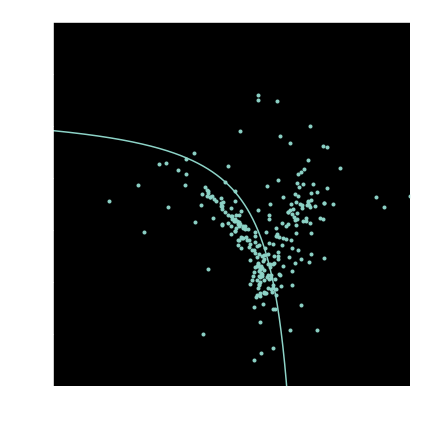

In [294]:
plt.figure(figsize=(6,6))
# plt.style.use('default')
plt.scatter(np.log10(catSDSS['6584/6563']),np.log10(catSDSS['5007/4861']),marker='.')

niihaspace = np.logspace(-2.5,0,1000)
def logclassLine(x):
    return 0.61/(np.log10(x) - 0.02) + 1.2
plt.plot(np.log10(niihaspace),logclassLine(niihaspace))

plt.title('BPT Diagram')
plt.xlabel('log 6584/6563')
plt.ylabel('log 5007/4861')
plt.xlim(-2.5,1)
plt.ylim(-1.5,2)
plt.tight_layout()
plt.savefig('mikesandboximgs/BPTDiagram.png')
plt.show()

## Let's try to reproduce the KE08 M91 Plot

Copying from above:

### M91 Theoretical Calibration

Let's use the M91 calibration mentioned in [Kewley & Ellison 2008 (KE08)](http://adsabs.harvard.edu/abs/2008ApJ...681.1183K):

$$12 + \log(O/H)_\text{lower} = 12 - 4.944 + 0.767x + 0.602x^2 - y(0.29+0.332x - 0.331x^2)$$

$$12 + \log(O/H)_\text{upper} = 12 - 2.939 - 0.2x - 0.37x^2 - 0.305 x^3 - 0.0283x^4 - y(0.0047 - 0.221x - 0.102x^2 - 0.0817x^3 - 0.00717x^4)$$

where $$x = \log R_{23} = \log\left[\frac{[\text{OII}\lambda3727 + [\text{OIII}]\lambda4959 + [\text{OIII}]\lambda5007}{\text{H}\beta}\right]$$
and $$y = \log\text{O}_{32} = \log\left[\frac{[\text{OIII}]\lambda4959 + [\text{OIII}]\lambda5007}{[\text{OII}]\lambda3727}\right]$$

```
def getlogR23(OII3727,OIII4959,OIII5007,HB):
    return np.log10((OII3727 + OIII4959 + OIII5007)/HB)

def getlogO32(OIII4959,OIII5007,OII3727):
    return np.log10((OIII4959 + OIII5007)/OII3727)
    ```

```
def getlogOHlow(x,y):
    return (-4.944 + 0.767*x + 0.602*x**2 - y*(0.29 + 0.332*x - 0.331*x**2))

def getlogOHup(x,y):
    return (-2.939 - 0.2*x - 0.37*x**2 - 0.305*x**3 - 0.0283*x**4 - 
            y*(0.0047 - 0.221*x - 0.102*x**2 - 0.0817*x**3 - 0.00717*x**4))
            ```

### Branching Out

Lets determine if this makes sense by following section A1 in KE08. First we need to determine if we are using the upper branch or the lower branch. To do this, we need to get $$\log\left(\frac{[\text{NII}]\lambda6584}{[\text{OII}]\lambda3727}\right)$$

```
def getlogNiiOii(NII6584,OII3727):
    return np.log10(NII6584/OII3727)
    ```

The break between upper and lower branches is set at $$\log\left(\frac{[\text{NII}]}{[\text{OII}]}\right) \approx -1.2$$ so we should use the upper branch, as we kind of determined already.

creating a function that deals with the branches right away:

In [282]:
def M91cal(obj):
    
    x = getlogR23(obj['OII3726'],obj['OIII4959'],obj['OIII5007'],obj['HBeta'])
    y = getlogO32(obj['OIII4959'],obj['OIII5007'],obj['OII3726'])
    
    if getlogNiiOii(obj['NII6584'],obj['OII3726']) > -1.2:
        return getlogOHup(x,y)
    else:
        return getlogOHlow(x,y)
    

In [283]:
M91list = [M91cal(cat) + 12 for cat in catSDSS]
catSDSS['M91'] = M91list

/Users/mike/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/Users/mike/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/Users/mike/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/mike/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """


In [284]:
M91cal(catSDSS[1])

/Users/mike/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


nan

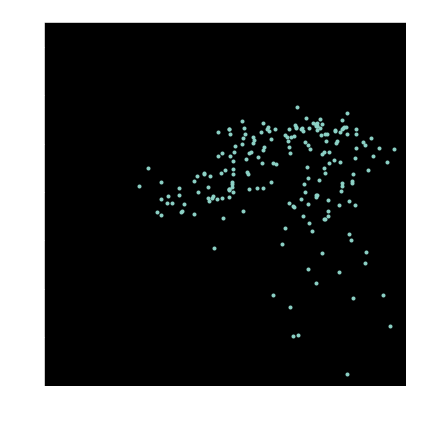

In [295]:
plt.figure(figsize=(6,6))
plt.scatter(catSDSS['logM'],catSDSS['M91'],marker = '.')
plt.title('M91 Calibration')
plt.xlabel('log M')
plt.ylabel('log (O/H) + 12')
plt.xlim(8,12)
plt.ylim(8,9.5)
plt.tight_layout()
plt.savefig('mikesandboximgs/m91.png')

Eh, this looks reasonably similar to Fig 1. These all have higher masses and there does seem to be a bunch trailing down at high mass which is a bit strange